In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

In [101]:
num = 100
X = np.linspace(-10,10,num=num).reshape(-1,1)
noise = np.random.normal(0,5,num).reshape(-1,1)
Y = X**3/10 + 30 + noise

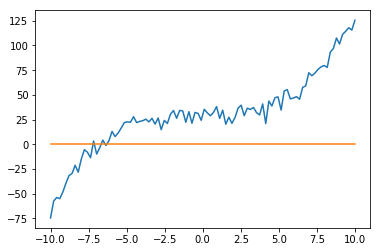

In [70]:
plt.plot(X,Y)
plt.plot(X,np.zeros(100))
plt.show()

# Let's find the line of best fit using Least Squares Regression!

In [104]:
help(lstsq)

Help on function lstsq in module scipy.linalg.basic:

lstsq(a, b, cond=None, overwrite_a=False, overwrite_b=False, check_finite=True, lapack_driver=None)
    Compute least-squares solution to equation Ax = b.
    
    Compute a vector x such that the 2-norm ``|b - A x|`` is minimized.
    
    Parameters
    ----------
    a : (M, N) array_like
        Left hand side matrix (2-D array).
    b : (M,) or (M, K) array_like
        Right hand side matrix or vector (1-D or 2-D array).
    cond : float, optional
        Cutoff for 'small' singular values; used to determine effective
        rank of a. Singular values smaller than
        ``rcond * largest_singular_value`` are considered zero.
    overwrite_a : bool, optional
        Discard data in `a` (may enhance performance). Default is False.
    overwrite_b : bool, optional
        Discard data in `b` (may enhance performance). Default is False.
    check_finite : bool, optional
        Whether to check that the input matrices contain o

In [81]:
# print("First bit of X:\n\n {}".format(X[:10]))
# print("First bit of C:\n\n {}".format(C[:10]))

In [82]:
A = X
b = Y

In [88]:
solution = lstsq(A,b)
lineOfBestFit = solution[0][0] # first index is to grab coefficients, second is because b might be a matrix.
lineOfBestFit

array([6.02245259])

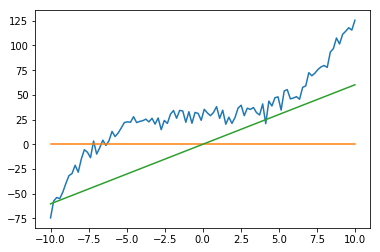

In [90]:
plt.plot(X,Y)
plt.plot(X,np.zeros(100))
plt.plot(X,lineOfBestFit[0]*X)
plt.show()

# Let's include the constant "1" as a feature to allow "affine" functions instead of strictly "linear" ones
## A linear map means that $y = \vec{m}\cdot\vec{x}$ for some $\vec{m}$, but affine means $y=\vec{m}\cdot\vec{x} + \vec{b}$
### Depending on who you ask, a "line" isn't even linear because $f(a+b) \neq f(a)+f(b)$. Other people, however, make a distinction between a linear "function" and a linear "map".

In [96]:
A = np.concatenate([X, np.ones((num,1))], axis=1)
b = Y

In [99]:
solution = lstsq(A,b)
lineOfBestFit = solution[0].T[0] #[0] gets coefficients rather than errors or other info.
lineOfBestFit

array([ 6.02245259, 30.28208205])

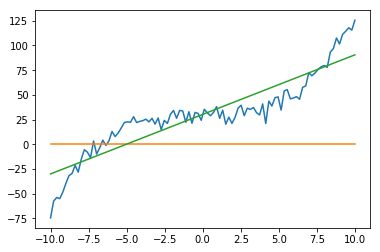

In [100]:
plt.plot(X,Y)
plt.plot(X,np.zeros(100))
plt.plot(X,lineOfBestFit[0]*X + lineOfBestFit[1]*np.ones((num,1)))
plt.show()